In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [27]:
# w/o piezo

# santec w/o MZI
df_no_MZI = pd.read_csv('santec laser data/Control.csv')

# santec w/ MZI
df_w_MZI = pd.read_csv('santec laser data/Control_MZI_FT_0.csv')

# w/ piezo


# santec w/ MZI
df_w_MZI_piezo = pd.read_csv('NKT laser data/Santec_TSL510_PhaseScan_100Hz.csv')

# Name columns 1 time and column 2 amplitude
df_no_MZI.columns = ['time', 'volt']
df_w_MZI.columns = ['time', 'volt']
df_w_MZI_piezo.columns = ['time', 'volt']

df_no_MZI = df_no_MZI[1:]
df_w_MZI = df_w_MZI[1:]
df_w_MZI_piezo = df_w_MZI_piezo[1:]

In [28]:
df_no_MZI['time'] = df_no_MZI['time'].astype(float)
df_no_MZI['volt'] = df_no_MZI['volt'].astype(float)

df_w_MZI_piezo['time'] = df_w_MZI_piezo['time'].astype(float)
df_w_MZI_piezo['volt'] = df_w_MZI_piezo['volt'].astype(float)

df_w_MZI['time'] = df_w_MZI['time'].astype(float)
df_w_MZI['volt'] = df_w_MZI['volt'].astype(float)

In [29]:
df_w_MZI_piezo

,time,volt
1,-0.025000,0.073658
2,-0.024995,0.070311
3,-0.024989,0.070311
4,-0.024984,0.070311
5,-0.024978,0.073658
...,...,...
9212,0.024970,0.060269
9213,0.024975,0.063616
9214,0.024981,0.066964
9215,0.024986,0.070311


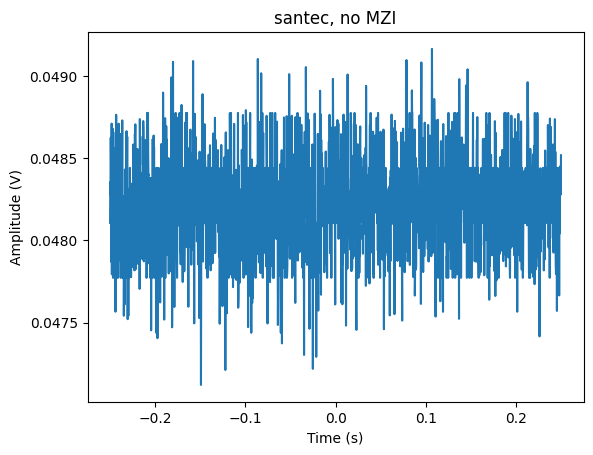

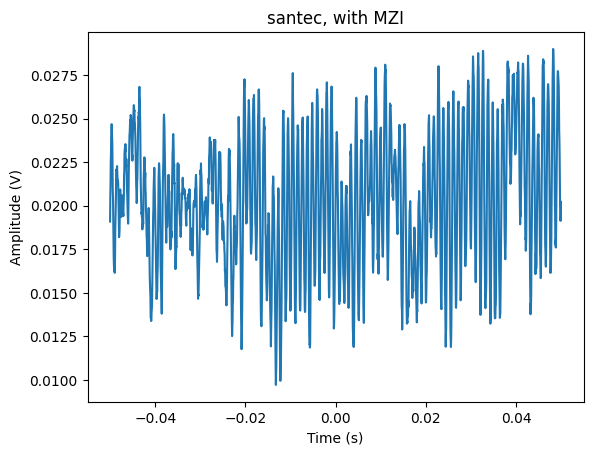

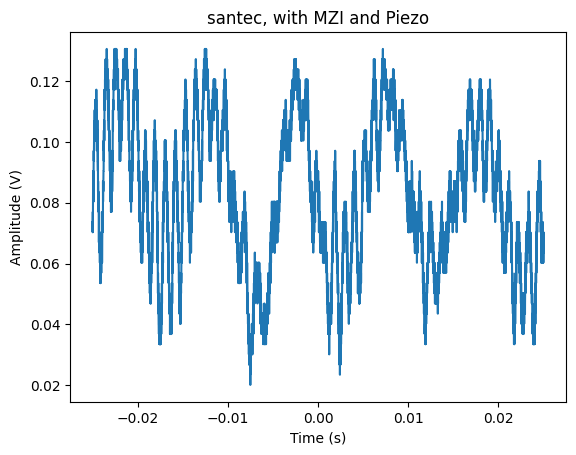

In [36]:
# FFT
fft_data_no_MZI = np.fft.rfft(pd.to_numeric(df_no_MZI['volt'].values))
fft_data_w_MZI = np.fft.rfft(pd.to_numeric(df_w_MZI['volt'].values))
fft_data_w_MZI_piezo = np.fft.rfft(pd.to_numeric(df_w_MZI_piezo['volt'].values))

dt = pd.to_numeric(df_w_MZI['time'].values[1]) - pd.to_numeric(df_w_MZI['time'].values[0])
dt_piezo = pd.to_numeric(df_w_MZI_piezo['time'].values[1]) - pd.to_numeric(df_w_MZI_piezo['time'].values[0])

freq = np.fft.rfftfreq(len(df_no_MZI['time']), dt)
freq_piezo = np.fft.rfftfreq(len(df_w_MZI_piezo['time']), dt_piezo)

# Plot
plt.figure()
plt.plot(pd.to_numeric(df_no_MZI['time'].values), pd.to_numeric(df_no_MZI['volt'].values))
plt.title('santec, no MZI')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.show()

plt.figure()
plt.plot(pd.to_numeric(df_w_MZI['time'].values), pd.to_numeric(df_w_MZI['volt'].values))
plt.title('santec, with MZI')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.show()

plt.figure()
plt.plot(pd.to_numeric(df_w_MZI_piezo['time'].values), pd.to_numeric(df_w_MZI_piezo['volt'].values))
plt.title('santec, with MZI and Piezo')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.show()





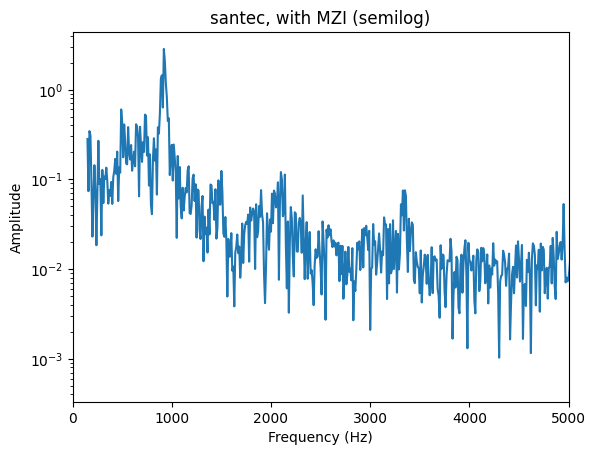

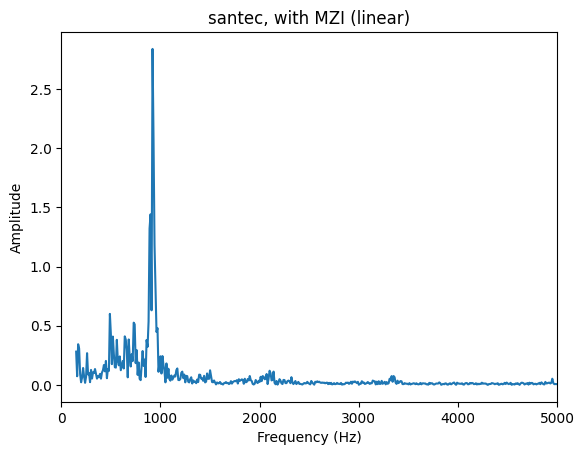

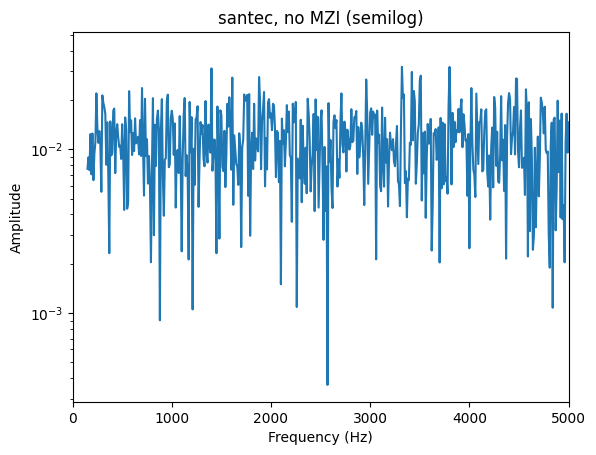

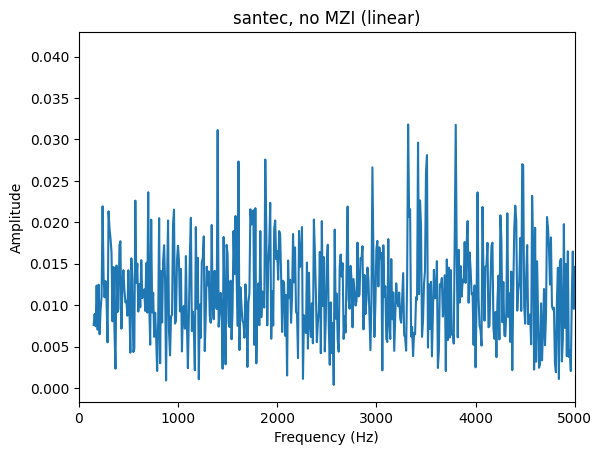

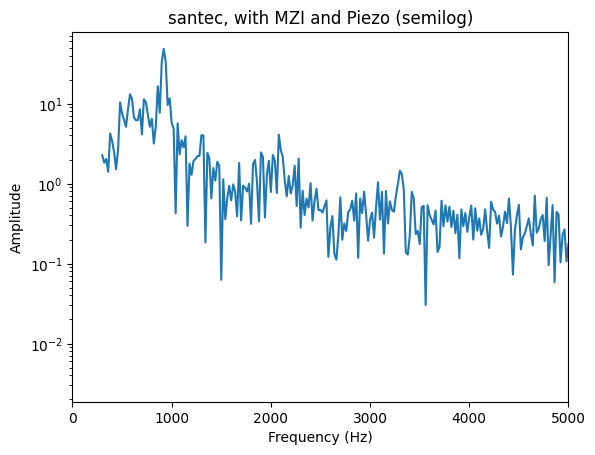

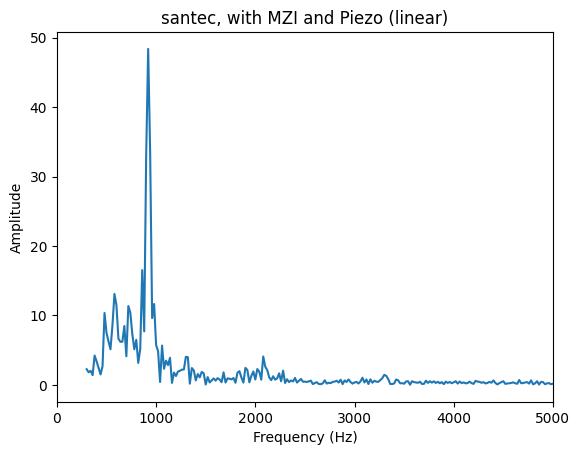

In [37]:
cut_off = 15

# Plot FFT
plt.figure()
plt.semilogy(freq[cut_off:], np.abs(fft_data_w_MZI)[cut_off:])
# plt.axvline(920, color='r', linestyle='--')
plt.title('santec, with MZI (semilog)')
plt.xlim(0, 5000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Linear
plt.figure()
plt.plot(freq[cut_off:], np.abs(fft_data_w_MZI)[cut_off:])
# plt.axvline(920, color='r', linestyle='--')
# plt.axvline(2100, color='r', linestyle='--')
# plt.axvline(3350, color='r', linestyle='--')
plt.xlim(0, 5000)
plt.title('santec, with MZI (linear)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Plot FFT for no MZI
plt.figure()
plt.semilogy(freq[cut_off:], np.abs(fft_data_no_MZI)[cut_off:])
plt.title('santec, no MZI (semilog)')
plt.xlim(0, 5000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Linear
plt.figure()
plt.plot(freq[cut_off:], np.abs(fft_data_no_MZI)[cut_off:])
plt.title('santec, no MZI (linear)')
plt.xlim(0, 5000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Plot FFT for w MZI and piezo
plt.figure()
plt.semilogy(freq_piezo[cut_off:], np.abs(fft_data_w_MZI_piezo)[cut_off:])
plt.title('santec, with MZI and Piezo (semilog)')
plt.xlim(0, 5000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Linear
plt.figure()
plt.plot(freq_piezo[cut_off:], np.abs(fft_data_w_MZI_piezo)[cut_off:])
plt.title('santec, with MZI and Piezo (linear)')
plt.xlim(0, 5000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()




# Limition of frequency in FFT arises from Nyquist theorem. The sampling rate is 1/dt. The highest frequency that can be resolved is 1/(2*dt) = 1/(2*0.00005) = 10000 Hz

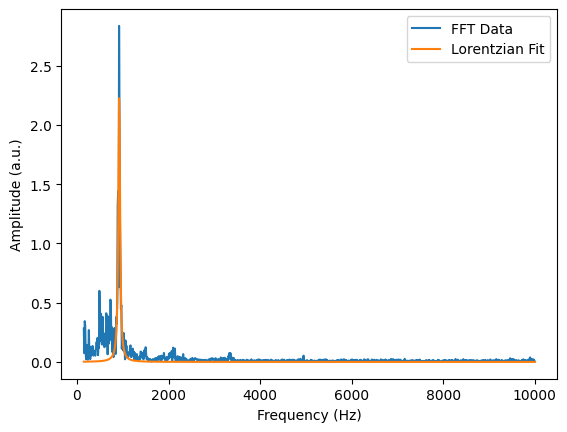

FWHM: 45.393572410689465
Sigma: 16.049051436940548
Center: 922.6347673636043


In [19]:
# Truncated data
data = np.abs(fft_data_w_MZI)[cut_off:]
frequency = freq[cut_off:]


# Define the Lorentzian function
def lorentzian(x, x0, gamma, A):
    return A / (1 + ((x - x0) / gamma)**2)

# Fit the Lorentzian function to the FFT data
popt, pcov = curve_fit(lorentzian, frequency, data, p0=(920, 10, 1000))

# Extract the fitted parameters
x0_fit, gamma_fit, A_fit = popt

# Plot the original FFT data and the fitted Lorentzian curve
plt.plot(frequency, data, label='FFT Data')
plt.plot(frequency, lorentzian(frequency, x0_fit, gamma_fit, A_fit), label='Lorentzian Fit')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.legend()
plt.show()


# Print sigma and FWHM
print('FWHM:', 2 * gamma_fit)
print('Sigma:', gamma_fit / np.sqrt(2))
print('Center:', x0_fit)
